# Introdução

O desenvolvimentos de métodos de mofologia matemática baseiam-se em teoridas de conjuntos da matemática. Esta abordagem considera a imagem como o conjunto universo, objetos com conjuntos contidos no conjunto universo e estuda o resultado de operadores de deslocamento livre sobre a imagem. As operações morfológica visam promover melhoramentos na imagem, como remoção de ruído, junção de elementos separados, achar vales e picos em uma imagem. Alguns dos métodos são os de (i) erosão e (ii) dilatação, são ditos como elementares neste âmbito.

A operação de erosão consiste na alteração morfológica da imagem e sua operação computa o mínimo local dentro da área do elemento estruturante enquanto que a dilatação

# Discussões sobre os métodos

O métodos morfológicos são simples operações baseadas na forma do imagem, cujo objetiva obter melhorasmentos da mesma. A entrada para o método é a imagem propriamente dita (no exemplo a seguir utilza-se uma imagem binária para melhor entendimento) e o elemento estruturante, que irá operar sobre a imagem, bit a bit.

Os métodos implementados a seguir são os métodos da erosão e dilatação, utilizando três elementos estruturantes distintos.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

- Abrir imagem:

In [2]:
img = np.array(cv2.imread('N-inv.png'))

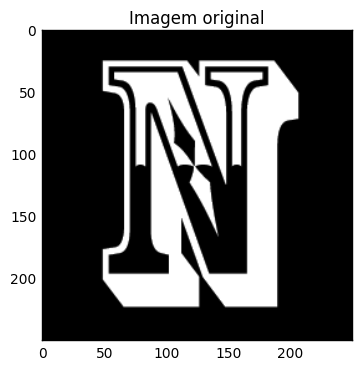

In [3]:
plt.figure(1)
plt.imshow(img)
#plt.axis("off")
plt.title("Imagem original")
plt.show()

### Erosão:

A erosão é um método que promove diminuição os limites do objeto e do seu fundo. 

- Elementro Estruturante 01:

In [4]:
def EE (size, type):
    if type == 1:
        # square
        kernel = np.ones(size, np.uint8)
        return kernel
    if type == 2:
        # star
        kernel = np.ones(size, np.uint8)
        center = np.uint8((size[0]/2))
        for k in range(0,size[0]):
            kernel[center,k] = 0
            kernel[k,center] = 0
        return kernel
    if type == 3:
        # something 01
        kernel = np.ones(size, np.uint8)
        center = np.uint8((size[0]/2))
        kernel[:,0] = 0
        kernel[center,1] = 0
        return kernel

In [5]:
size = np.array([3,3])
el_est = EE(size, 1)

img_erosion = cv2.erode(img, el_est,  iterations=2)

print(el_est)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


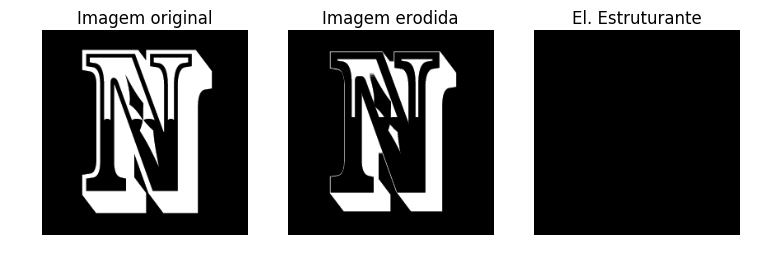

In [6]:
plt.figure(figsize=(9,9))
plt.subplot(131)
plt.imshow(img)
plt.axis("off")
plt.title("Imagem original")

plt.subplot(132)
plt.imshow(img_erosion)
plt.axis("off")
plt.title("Imagem erodida")

plt.subplot(133)
plt.imshow(el_est, 'gray', interpolation='nearest')
plt.axis("off")
plt.grid()
plt.title("El. Estruturante")
plt.show()

- Elementos Estruturante 02:

In [7]:
size = np.array([3,3])
el_est = EE(size, 2)

img_erosion = cv2.erode(img, el_est,  iterations=2)

print(el_est)

[[1 0 1]
 [0 0 0]
 [1 0 1]]


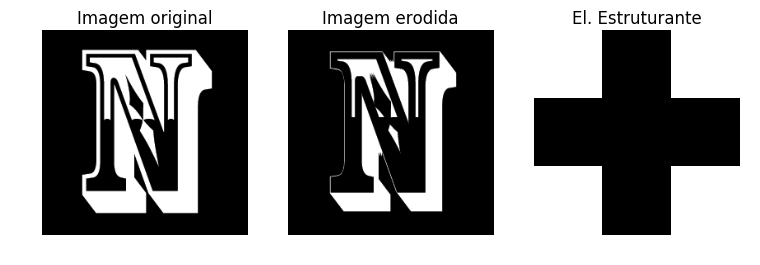

In [8]:
plt.figure(figsize=(9,9))
plt.subplot(131)
plt.imshow(img)
plt.axis("off")
plt.title("Imagem original")

plt.subplot(132)
plt.imshow(img_erosion)
plt.axis("off")
plt.title("Imagem erodida")

plt.subplot(133)
plt.imshow(el_est, 'gray', interpolation='nearest')
plt.axis("off")
plt.grid()
plt.title("El. Estruturante")
plt.show()

- Elementos Estruturante 03:

In [9]:
size = np.array([3,3])
el_est = EE(size, 3)

img_erosion = cv2.erode(img, el_est,  iterations=2)

print(el_est)

[[0 1 1]
 [0 0 1]
 [0 1 1]]


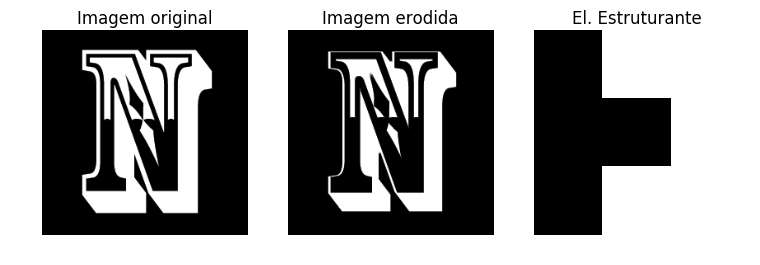

In [10]:
plt.figure(figsize=(9,9))
plt.subplot(131)
plt.imshow(img)
plt.axis("off")
plt.title("Imagem original")

plt.subplot(132)
plt.imshow(img_erosion)
plt.axis("off")
plt.title("Imagem erodida")

plt.subplot(133)
plt.imshow(el_est, 'gray', interpolation='nearest')
plt.axis("off")
plt.grid()
plt.title("El. Estruturante")
plt.show()

Todos os elementos estruturantes operam da mesma forma na imagem, retraíndo o branco sobre o fundo preto e diminuindo as barreiras entre o objeto e o seu fundo, porém há diferenças:

- O elemento estruturante 1 promovre erosão em todos os sentidos;
- O elemento estruturante 2 promove erosão em apenas dis sentidos;
- O elemento estruturante 3 promove erosão de acordo com a sua forma;

### Dilatação:

A dilatação promove resultados análogos a erosão: aumento da região branca sobre a região preta, aumentod o objeto sobre o fundo.

- Elementro Estruturante 01:

In [11]:
size = np.array([3,3])
el_est = EE(size, 1)

img_erosion = cv2.dilate(img, el_est,  iterations=2)

print(el_est)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


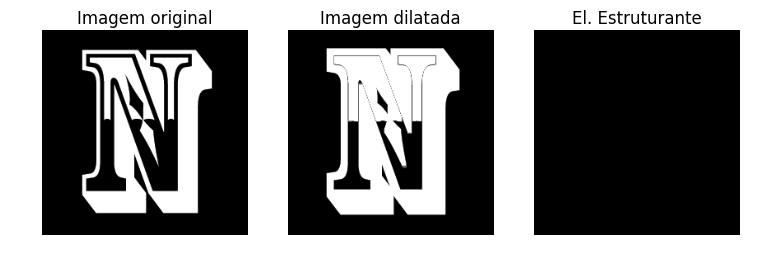

In [12]:
plt.figure(figsize=(9,9))
plt.subplot(131)
plt.imshow(img)
plt.axis("off")
plt.title("Imagem original")

plt.subplot(132)
plt.imshow(img_erosion)
plt.axis("off")
plt.title("Imagem dilatada")

plt.subplot(133)
plt.imshow(el_est, 'gray', interpolation='nearest')
plt.axis("off")
plt.grid()
plt.title("El. Estruturante")
plt.show()

- Elementos Estruturante 02:

In [13]:
size = np.array([3,3])
el_est = EE(size, 2)

img_erosion = cv2.dilate(img, el_est,  iterations=2)

print(el_est)

[[1 0 1]
 [0 0 0]
 [1 0 1]]


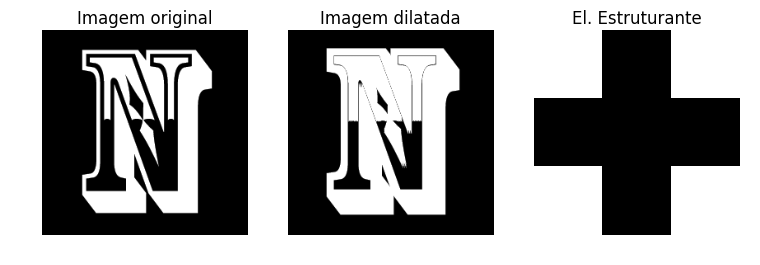

In [14]:
plt.figure(figsize=(9,9))
plt.subplot(131)
plt.imshow(img)
plt.axis("off")
plt.title("Imagem original")

plt.subplot(132)
plt.imshow(img_erosion)
plt.axis("off")
plt.title("Imagem dilatada")

plt.subplot(133)
plt.imshow(el_est, 'gray', interpolation='nearest')
plt.axis("off")
plt.grid()
plt.title("El. Estruturante")
plt.show()

- Elementos Estruturante 03:

In [15]:
size = np.array([3,3])
el_est = EE(size, 3)

img_erosion = cv2.dilate(img, el_est,  iterations=2)

print(el_est)

[[0 1 1]
 [0 0 1]
 [0 1 1]]


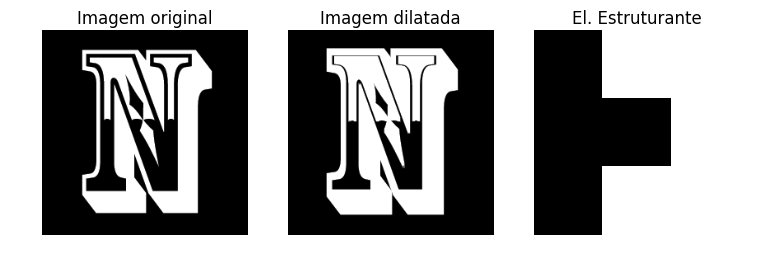

In [16]:
plt.figure(figsize=(9,9))
plt.subplot(131)
plt.imshow(img)
plt.axis("off")
plt.title("Imagem original")

plt.subplot(132)
plt.imshow(img_erosion)
plt.axis("off")
plt.title("Imagem dilatada")

plt.subplot(133)
plt.imshow(el_est, 'gray', interpolation='nearest')
plt.axis("off")
plt.grid()
plt.title("El. Estruturante")
plt.show()

Em todas as dilatações os resultados são parecidos, pois há uma sobreposição do branco sobre o fundo preto e aumento da área do objeto em branco. A aplicação dos elementos estruturantes promove as seguinte diferenças:

- O elemento estruturante 1 promovre dilatação em todos os sentidos;
- O elemento estruturante 2 promove dilatação em apenas dis sentidos;
- O elemento estruturante 3 promove dilatação de acordo com a sua forma;

## Dualidade entre erosão e dilatação

Utilizando a mesma imagem, porém com as cores invertidas é fácil visualizar a aplicação dos métodos:
- A erosão promove uma diminuição da região branca, logo um aumento do objeto
- A dilatação promove um aumento da região branca, uma diminuição do objeto.

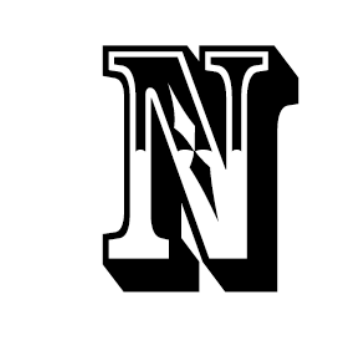

In [17]:
img2 = np.array(cv2.imread('N.png'))

plt.figure(1)
plt.imshow(img2)
plt.axis("off")
#plt.title("Imagem original")
plt.show()

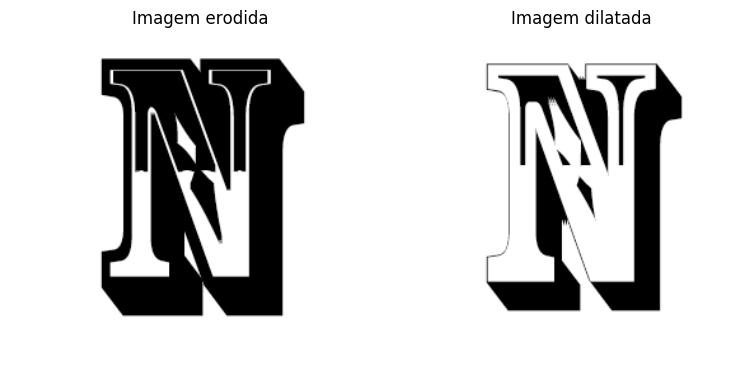

In [18]:
size = np.array([3,3])
el_est = EE(size, 3)

img2_erosion = cv2.erode(img2, el_est,  iterations=2)

size = np.array([3,3])
el_est = EE(size, 2)

img2_dilate = cv2.dilate(img2, el_est,  iterations=2)

plt.figure(figsize=(9,9))
plt.subplot(121)
plt.imshow(img2_erosion)
plt.axis("off")
plt.title("Imagem erodida")

plt.subplot(122)
plt.imshow(img2_dilate)
plt.axis("off")
plt.title("Imagem dilatada")

plt.show()

# Conclusão

Os métodos morfológicos de erosão e dilatação são operadores elementares que funcionam de forma dual, dependendo da imagem em questão. Em imagens binárias promovem diminuição e crescimento de regiões brancas respectivamente, e espera-se que em imagens tons de cinza promovam efeitos semelhante a filtros passa-alta a e passa-baixa, removendo ruídos, ressaltando bordas e outras operações.